<h2 align='center'>Aprendizado Supervisionado no Neurônio Perceptron <br> Programação Estruturada</h2>
<h3>Alex T. Carvalho <br> 1515080008 </h3>
<h3>Hiago Oliveira de Jesus <br> 1515280014 </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I

In [2]:
archiveAll = 'dataAll.txt'
dataAll = np.fromfile(archiveAll)
lenAll = int(len(dataAll)/3)
dataAll = np.reshape(dataAll, (lenAll,3)) 
# Eu sei que é (m,1,3), mas na prática não vimos muita diferença então colocamos (m,3)

dataAll

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [3]:
w = np.random.uniform(low=-0.5,high=0.5,size=2)
x = dataAll
err = np.repeat(1, len(x)) #
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err)):
    epoca += 1
    print("Época",epoca)
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            w = w + n*(yd-y)*xd
            print(w)
        else:
            err[i] = 0

Pesos iniciais: [-0.03653613  0.47545447]
Época 1
[ 36.34230387 -23.93877553]
[ -17.31674613 -100.43452553]
[ 55.47927387 -64.60496553]
[138.07797387  15.25086447]
[143.92373387 -63.04372553]
[ 103.91482387 -140.93641553]
[157.58463387 -91.84414553]
[ 104.62457387 -148.71360553]
[164.18409387 -98.59127553]
[ 118.65946387 -164.22720553]
[209.37532387 -89.51388553]
[ 151.59433387 -149.82203553]
[ 103.32777387 -198.29175553]
[ 173.77512387 -156.17548553]
[ 126.93312387 -207.58535553]
[ 196.79675387 -143.36641553]
[ 140.96102387 -199.54394553]
[ 217.94849387 -134.69461553]
[ 181.67845387 -177.92265553]
[ 163.43931387 -196.25629553]
[ 238.86175387 -130.20118553]
[ 174.50262387 -212.62362553]
[ 265.81083387 -129.35285553]
[ 218.76600387 -217.25679553]
Época 2
[ 170.49944387 -265.72651553]
[ 240.36307387 -201.50757553]
[ 184.52734387 -257.68510553]
[ 261.51481387 -192.83577553]
[ 225.24477387 -236.06381553]
[ 308.13664387 -153.28232553]
[ 261.98926387 -209.93170553]
[ 235.36364387 -242.454075

In [4]:
print("Foram feitos",aj,"ajustes")
print("E se levaram",epoca,"épocas")

# O número total de ajustes no vetor de pesos;
# (b) O número de épocas até a convergência;
# (c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
# obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
# cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.
# x2 = 1.000369759x1

Foram feitos 55 ajustes
E se levaram 4 épocas


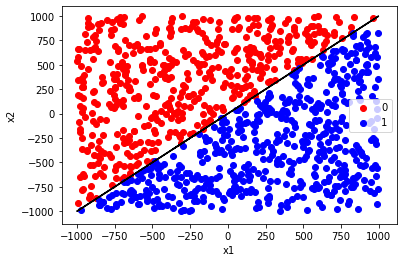

In [5]:
import pandas as pd

df = pd.DataFrame(dataAll, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")
        
x_ = np.array(df['x1'])
y = x_ * (-w[0]/w[1])

plt.plot(x_, y,'black')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

# Parte II

Pesos iniciais: [-69.82180833  -2.61232652]
Taxa de aprendizado: 0.4
Intervalo: -100.0 100.0
Pesos finais: [0.3265444 0.47776  ]
Épocas passadas: 100
Quantidade de certos: 528 / 600



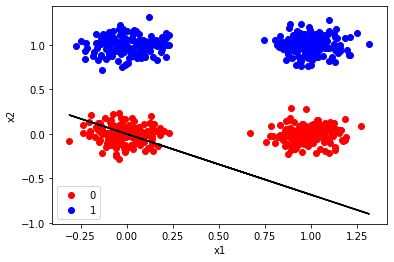

Pesos iniciais: [ 0.55869683 -0.69108554]
Taxa de aprendizado: 0.4
Intervalo: -1.0 1.0
Pesos finais: [0.31565639 0.49556983]
Épocas passadas: 100
Quantidade de certos: 527 / 600



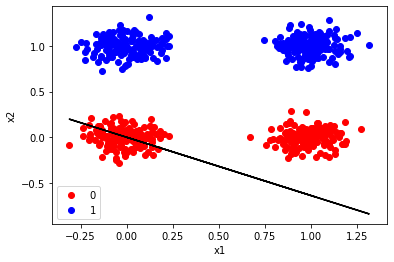

Pesos iniciais: [-0.43409077  0.26740827]
Taxa de aprendizado: 0.4
Intervalo: -0.5 0.5
Pesos finais: [0.41143728 0.43726164]
Épocas passadas: 100
Quantidade de certos: 526 / 600



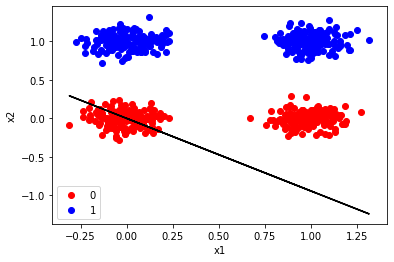

Pesos iniciais: [98.67324208 77.0044254 ]
Taxa de aprendizado: 0.1
Intervalo: -100.0 100.0
Pesos finais: [-3.73934883 12.58955813]
Épocas passadas: 100
Quantidade de certos: 518 / 600



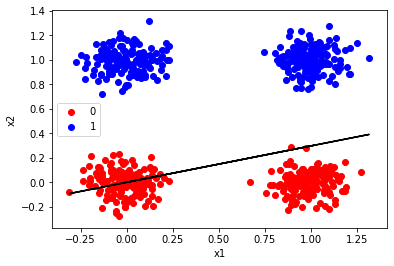

Pesos iniciais: [0.79134714 0.06988957]
Taxa de aprendizado: 0.1
Intervalo: -1.0 1.0
Pesos finais: [0.1043656  0.10828136]
Épocas passadas: 100
Quantidade de certos: 522 / 600



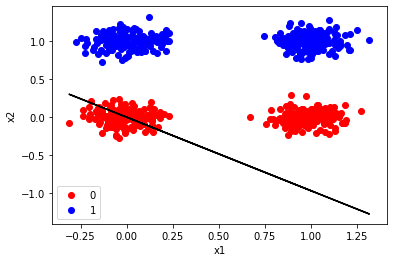

Pesos iniciais: [-0.37235163 -0.2133663 ]
Taxa de aprendizado: 0.1
Intervalo: -0.5 0.5
Pesos finais: [0.10241176 0.10825269]
Épocas passadas: 100
Quantidade de certos: 525 / 600



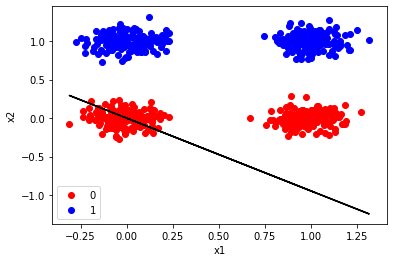

Pesos iniciais: [ 19.8418494  -42.10218915]
Taxa de aprendizado: 0.01
Intervalo: -100.0 100.0
Pesos finais: [0.01027336 0.0111187 ]
Épocas passadas: 100
Quantidade de certos: 529 / 600



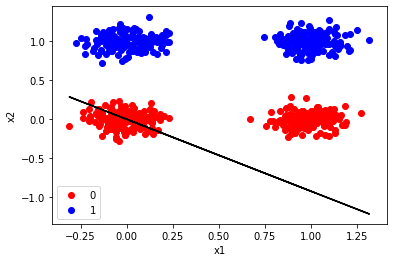

Pesos iniciais: [ 0.89320299 -0.27377272]
Taxa de aprendizado: 0.01
Intervalo: -1.0 1.0
Pesos finais: [0.01028357 0.01093059]
Épocas passadas: 100
Quantidade de certos: 526 / 600



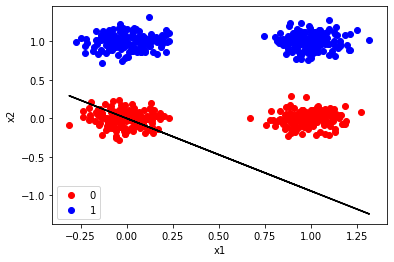

Pesos iniciais: [-0.01844172 -0.2645822 ]
Taxa de aprendizado: 0.01
Intervalo: -0.5 0.5
Pesos finais: [0.00882336 0.01163163]
Épocas passadas: 100
Quantidade de certos: 525 / 600



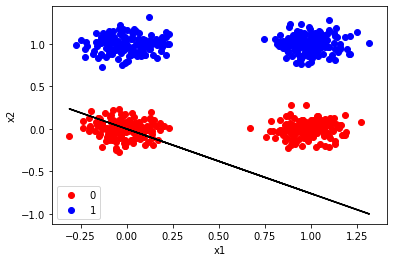

In [6]:
# Hiago - 1515280014
# Alex - 1515080008

archive = 'data' + str((4+8) % 4) + '.txt'
data0 = np.fromfile(archive)
len0 = int(len(data0)/3)
data0 = np.reshape(data0, (len0,3))

nl = np.array([0.4,0.1,0.01])
Il = np.array([100, 1, 0.5])
wl = np.array([])
ajl = np.array([])

for N in nl:
    for I in Il:
        w = np.random.uniform(low=-I,high=I,size=2)
        x = data0
        err = np.repeat(1, len(x))
        n = N
        aj = 0
        print("Pesos iniciais:",w)
        epoca = 0
        l = []
        while (np.isin(1, err) and epoca < 100):
            epoca += 1
            for i in range(len(x)):
                yd = x[i][2]
                xd = np.array([x[i][0],x[i][1]])
                sigma = w[0]*xd[0]+w[1]*xd[1]
                if (sigma >= 0): # função degrau
                    y = 1
                else:
                    y = 0
                if (y != yd):
                    err[i] = 1
                    aj += 1
                    
                    w = w + n*(yd-y)*xd
                    #print(w)
                else:
                    err[i] = 0
        print("Taxa de aprendizado:",n)
        print("Intervalo:",-I,I)
        print("Pesos finais:",w)
        print("Épocas passadas:",epoca)
        print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))
        print()
        
        wl = np.append(wl,w)
        ajl = np.append(ajl, aj)
        
        df = pd.DataFrame(data0, columns=['x1', 'x2', 'y'])

        x0 = np.array(df[df['y'] == 0]) 
        x1 = np.array(df[df['y'] == 1]) 

        X = [x0, x1]
        colors = ["red", "blue"]

        for x, c in zip(X, colors):
            if c == "red":
                plt.scatter(x[:,0], x[:,1], color = c, label = "0")
            else:
                plt.scatter(x[:,0], x[:,1], color = c, label = "1")

        x_ = np.array(df['x1'])
        y = x_ * (-w[0]/w[1])

        plt.plot(x_, y,'black')

        plt.legend()
        plt.xlabel("x1")
        plt.ylabel("x2")

        plt.show()
wl = np.reshape(wl, (9,2))

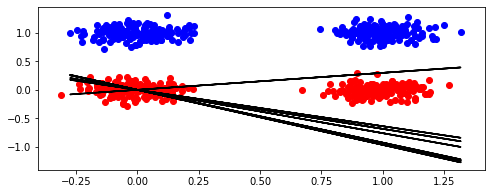

In [7]:
df = pd.DataFrame(data0, columns=['x1', 'x2', 'y'])
x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")

fig = plt.gcf()
fig.set_size_inches(8, 3)
for i in range(len(wl)):
    y = x*(-wl[i][0]/wl[i][1])
    plt.plot(x, y, color='black')
plt.show()

0.3265444024559394 0.47776000434723565
0.3156563880139673 0.4955698283444857
0.4114372847566457 0.43726163935804985
-3.739348827627297 12.589558131990323
0.10436559911851837 0.10828135927212526
0.1024117634745256 0.10825268543250754
0.010273359422114017 0.01111869668292642
0.010283574092962204 0.010930592479137309
0.008823362146167382 0.011631627119592333
Média dos ajustes: 8464.333333333334
Desvio padrão dos ajustes: 2273.651834970928


,média,desvio padrão
0,8464.333333,2273.651835


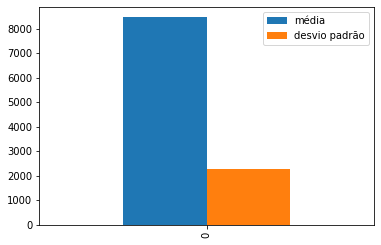

In [8]:
for i in wl:
    print(i[0],i[1])
print("Média dos ajustes:", ajl.mean())
print("Desvio padrão dos ajustes:",ajl.std())

table = pd.DataFrame([[ajl.mean(), ajl.std()]], columns=['média', 'desvio padrão'])

table.plot(kind='bar')

table.head()

# Parte III

In [9]:
archive = 'dataHoldout.txt'
dataH = np.fromfile(archive)
dataH = np.reshape(dataH, (int(len(dataH)/3),3))
dataH

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [10]:
# Fazendo o split 70%-30%

np.random.shuffle(dataH)

# Define a size for your train set 
train_size = int(0.7 * len(dataH))

# Split your dataset 
train_set = dataH[:train_size]
test_set = dataH[train_size:]

In [11]:
w = np.random.uniform(low=-1.0,high=1.0,size=2)
x = train_set
err = np.repeat(1, len(x))
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err) and epoca < 100):
    epoca += 1
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            
            w = w + n*(yd-y)*xd
            #print(w)
        else:
            err[i] = 0
    np.random.shuffle(train_set)
    # Randomizando o treinamento ao fim de cada época
print("Pesos finais:",w)
print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))

Pesos iniciais: [ 0.90195884 -0.55992232]
Pesos finais: [-0.05324895 -0.11171226]
Quantidade de certos: 461 / 560


In [12]:
x = train_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1
w3 = w
confusion_matrix = np.array([[tp,fp],[fn, tn]])
print("Quantidade de certos:",right,"/",len(x))
tpTrain = tp
fpTrain = fp
fnTrain = fn
tnTrain = tn
rightTrain = right
confusion_matrix

Quantidade de certos: 478 / 560


array([[ 60,   4],
       [ 78, 418]])

In [13]:
x = test_set
x3 = x
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1

y3 = x3*(-w3[0]/w3[1])
rightTest= right
confusion_matrix = np.array([[tp,fp],[fn, tn]])
tpTest = tp
fpTest = fp
fnTest = fn
tnTest = tn
print("Quantidade de certos:",right,"/",len(x))
confusion_matrix

Quantidade de certos: 208 / 240


array([[ 31,   1],
       [ 31, 177]])

## Métricas de desempenho

In [14]:
# Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
acTrain = rightTrain/train_size
print("Acurácia do treino:",acTrain)
# Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F -Score;
precTrain = tpTrain/(tpTrain+fpTrain)
revoTrain = tpTrain/(tpTrain+fnTrain)
FScoreTrain = (2*(precTrain*revoTrain))/(precTrain+revoTrain)
print("Precisão do treino:",precTrain)
print("Revocação do treino:",revoTrain)
print("F-Score do treino:",FScoreTrain)

Acurácia do treino: 0.8535714285714285
Precisão do treino: 0.9375
Revocação do treino: 0.43478260869565216
F-Score do treino: 0.594059405940594


In [15]:
# Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
acTest = rightTest/(len(dataH)-train_size)
print("Acurácia do teste:",acTest)
# Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F -Score;
precTest = tpTest/(tpTest+fpTest)
revoTest = tpTest/(tpTest+fnTest)
FScoreTest = (2*(precTest*revoTest))/(precTest+revoTest)
print("Precisão do teste:",precTest)
print("Revocação do teste:",revoTest)
print("F-Score do teste:",FScoreTest)

Acurácia do teste: 0.8666666666666667
Precisão do teste: 0.96875
Revocação do teste: 0.5
F-Score do teste: 0.6595744680851063


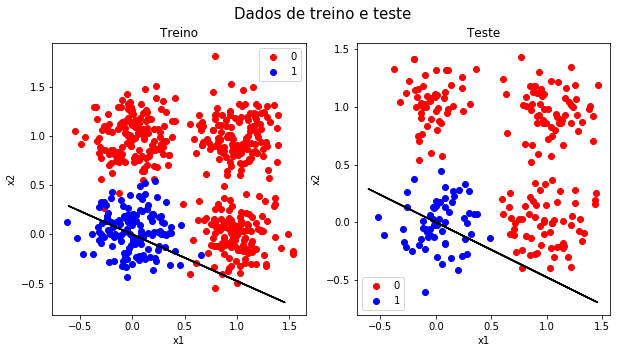

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Dados de treino e teste', fontsize=15)

axs[0].set_title('Treino')
axs[1].set_title('Teste')

axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')


df = pd.DataFrame(train_set, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]



for x, c in zip(X, colors):
    if c == "red":
        axs[0].scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        axs[0].scatter(x[:,0], x[:,1], color = c, label = "1")

axs[0].plot(x3, y3, color='black')

df = pd.DataFrame(test_set, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        axs[1].scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        axs[1].scatter(x[:,0], x[:,1], color = c, label = "1")
axs[1].plot(x3, y3, color='black')

axs[0].legend()
axs[1].legend()
      
plt.show()